In [1]:
!unzip "/content/archive (7).zip"

Archive:  /content/archive (7).zip
  inflating: creditcard.csv          


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [3]:
dataset=pd.read_csv("/content/creditcard.csv")

In [4]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
dataset.shape

(284807, 31)

In [6]:
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
dataset.duplicated().sum()

np.int64(1081)

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
dataset['Class'].value_counts()

,count
Class,
0,283253
1,473


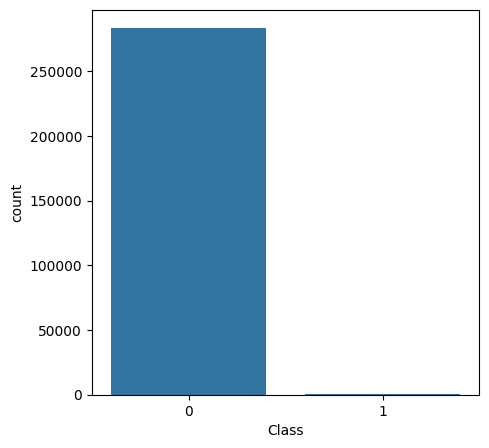

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class', data=dataset)
plt.show()

Time


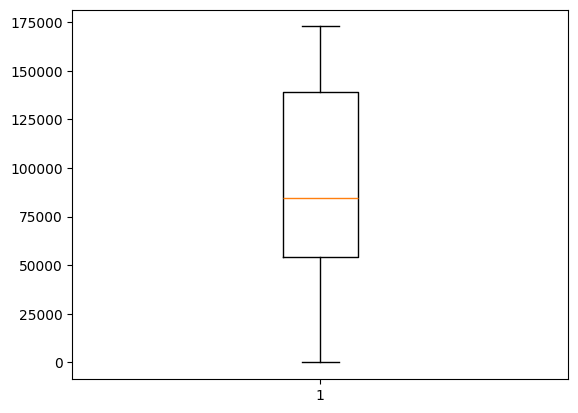

V1


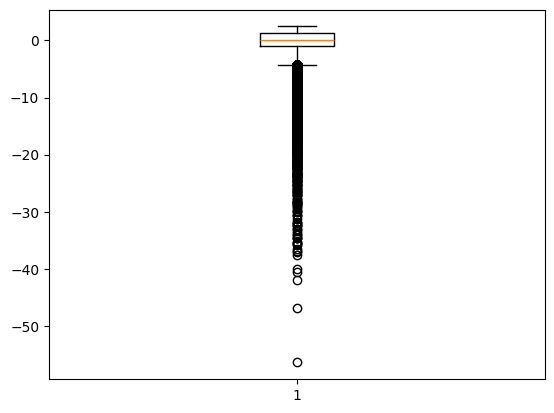

V2


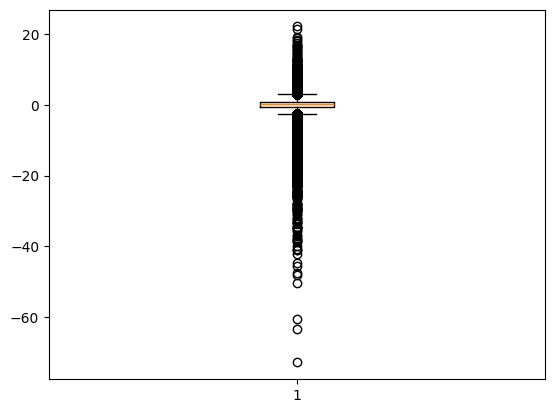

V3


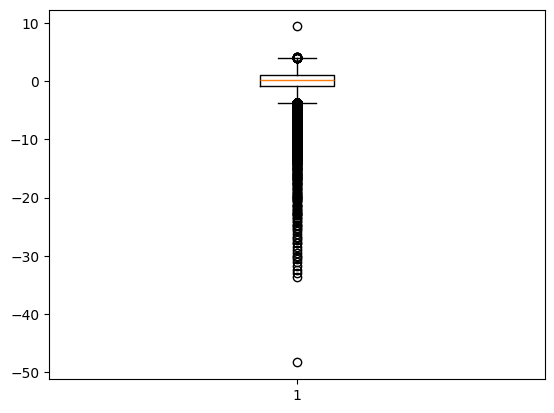

V4


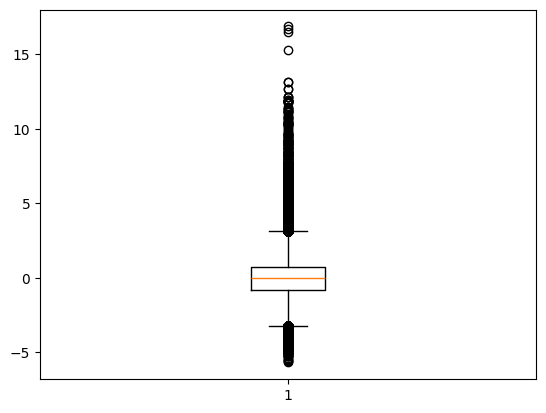

V5


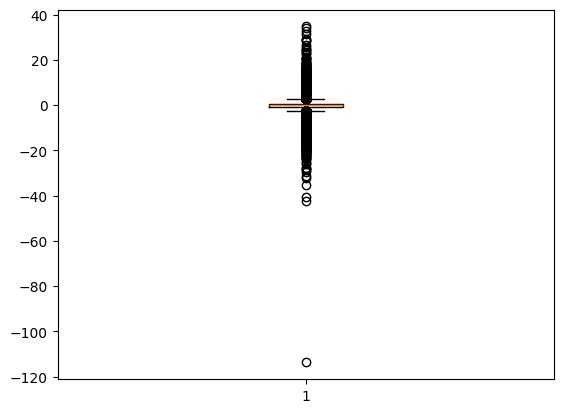

V6


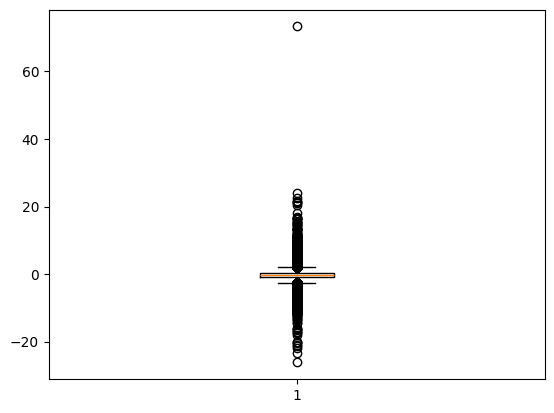

V7


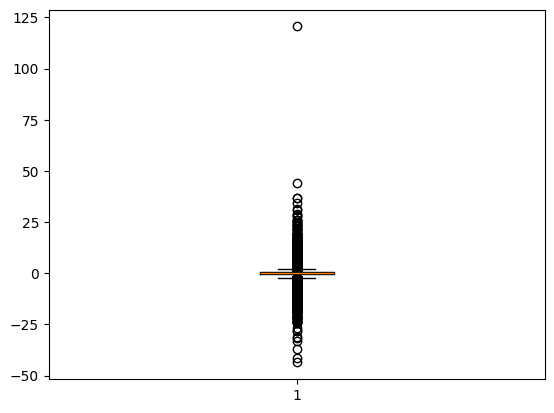

V8


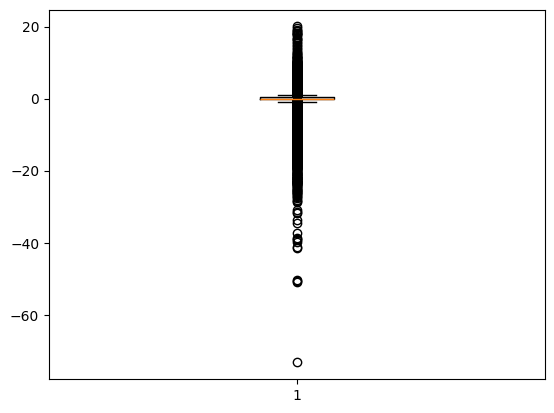

V9


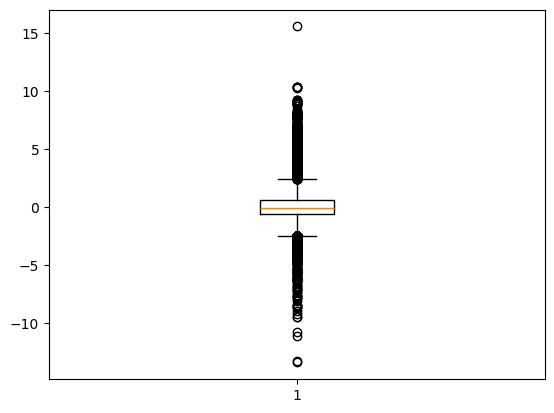

V10


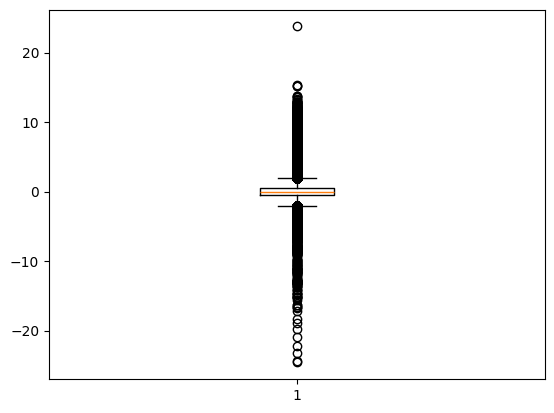

V11


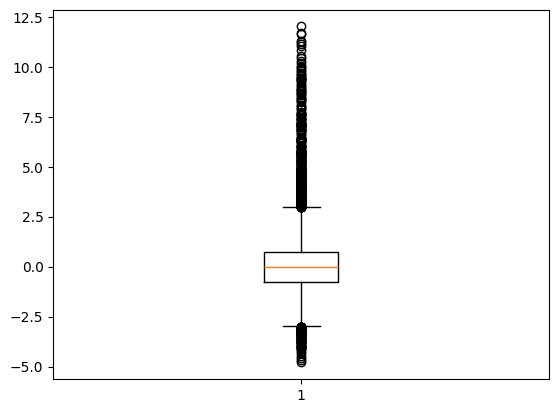

V12


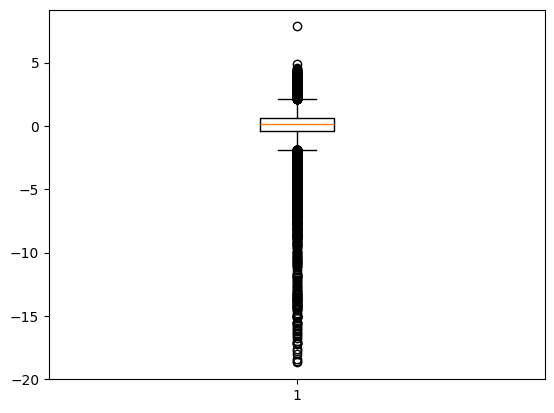

V13


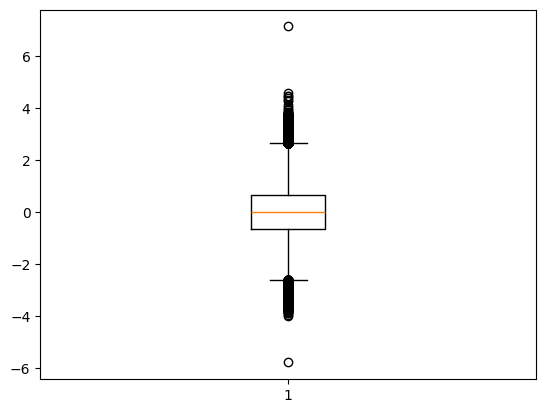

V14


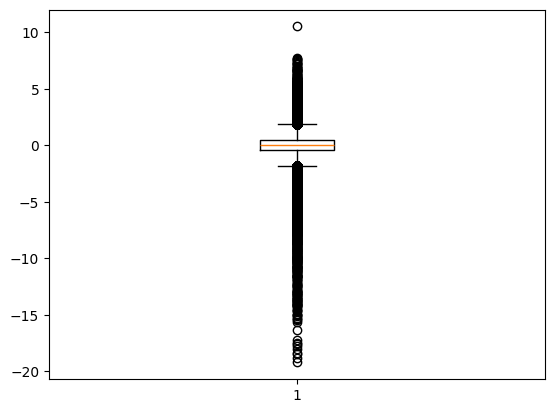

V15


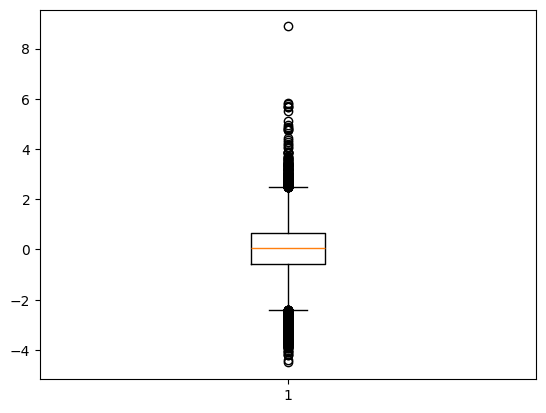

V16


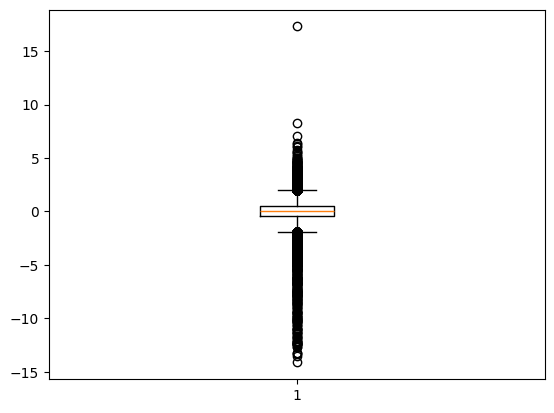

V17


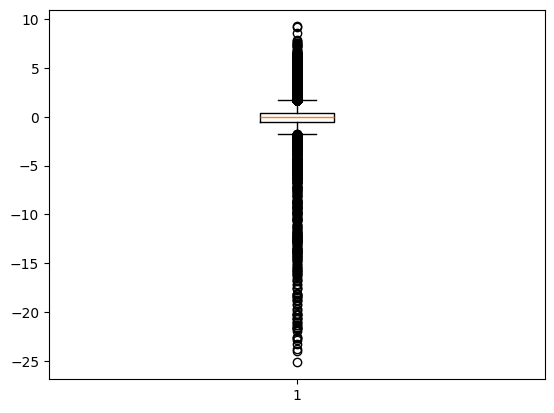

V18


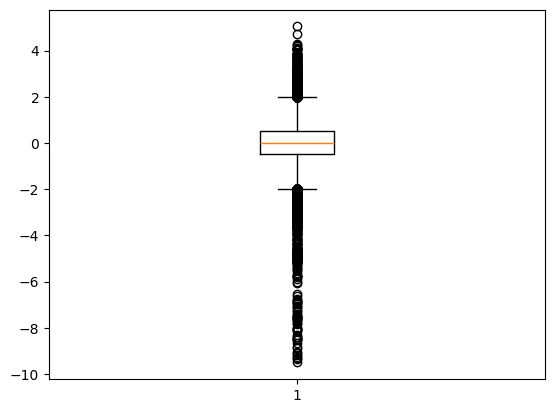

V19


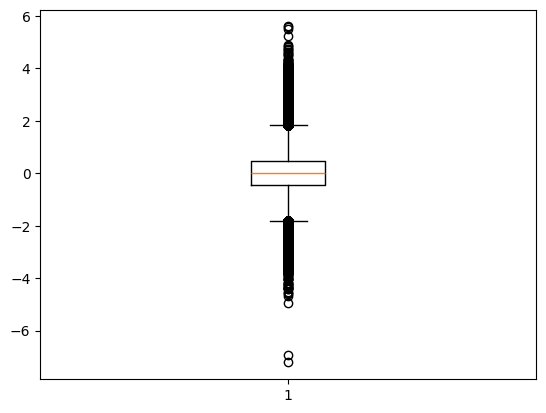

V20


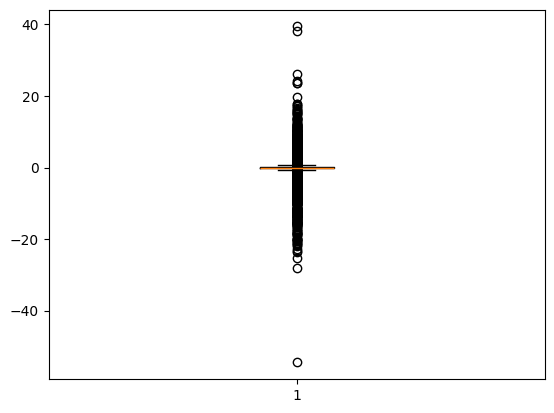

V21


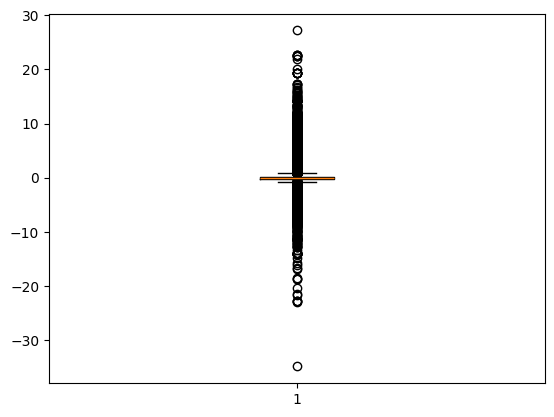

V22


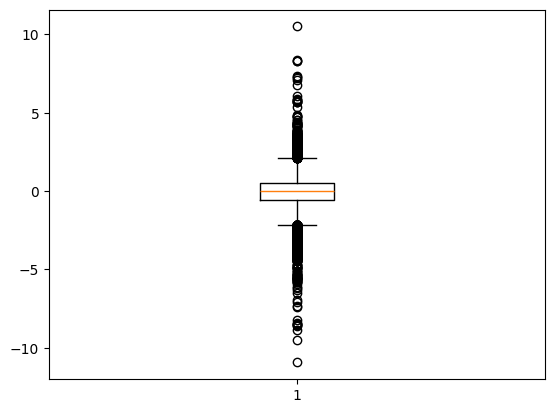

V23


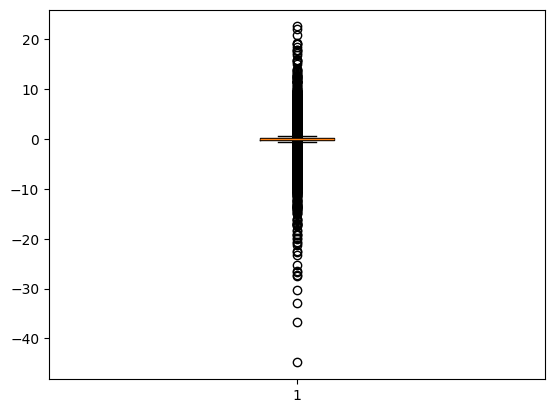

V24


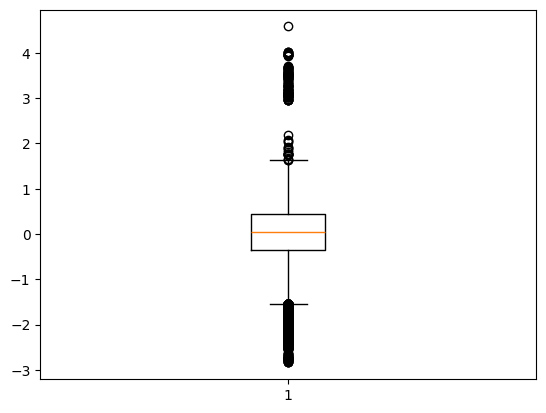

V25


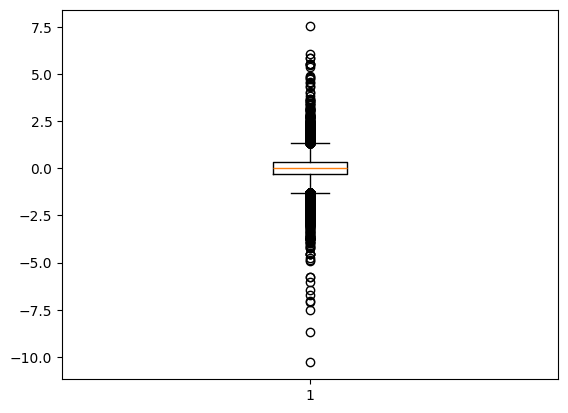

V26


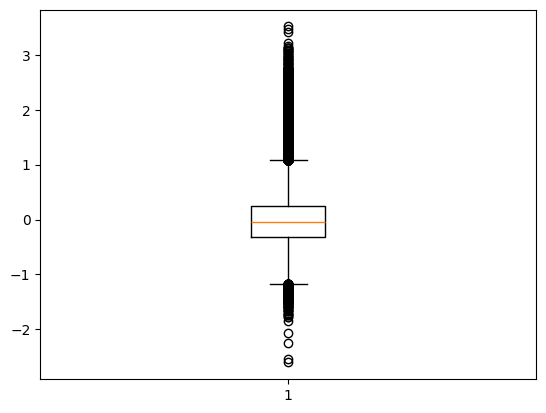

V27


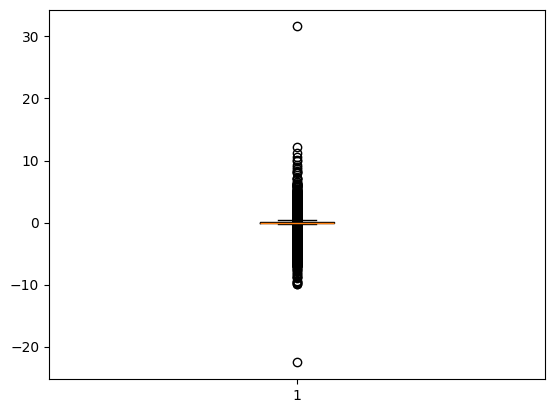

V28


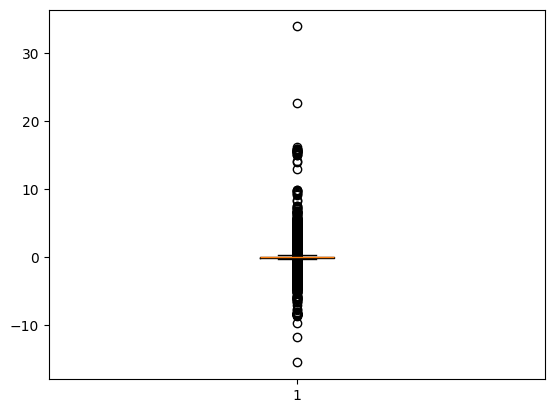

Amount


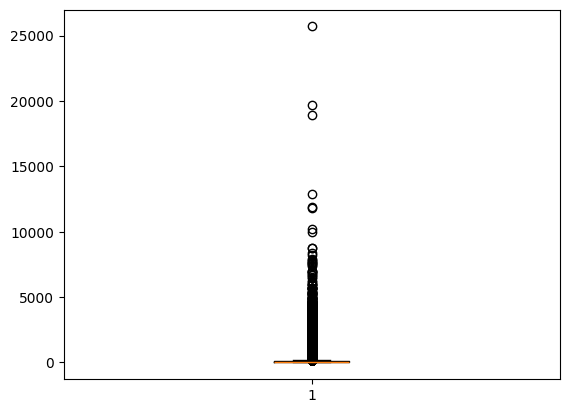

In [12]:
for i in dataset.columns:
  if(i!='Class'):
   print(i)
   plt.boxplot(dataset[i])
   plt.show()

In [13]:
def remove_outliers(df, col_names):
    df_cleaned = df.copy()
    for col in col_names:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned


In [14]:
cols_to_check = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
df_no_outliers = remove_outliers(dataset, cols_to_check)

filtered_index = df_no_outliers.index

df_no_outliers_full = dataset.loc[filtered_index]




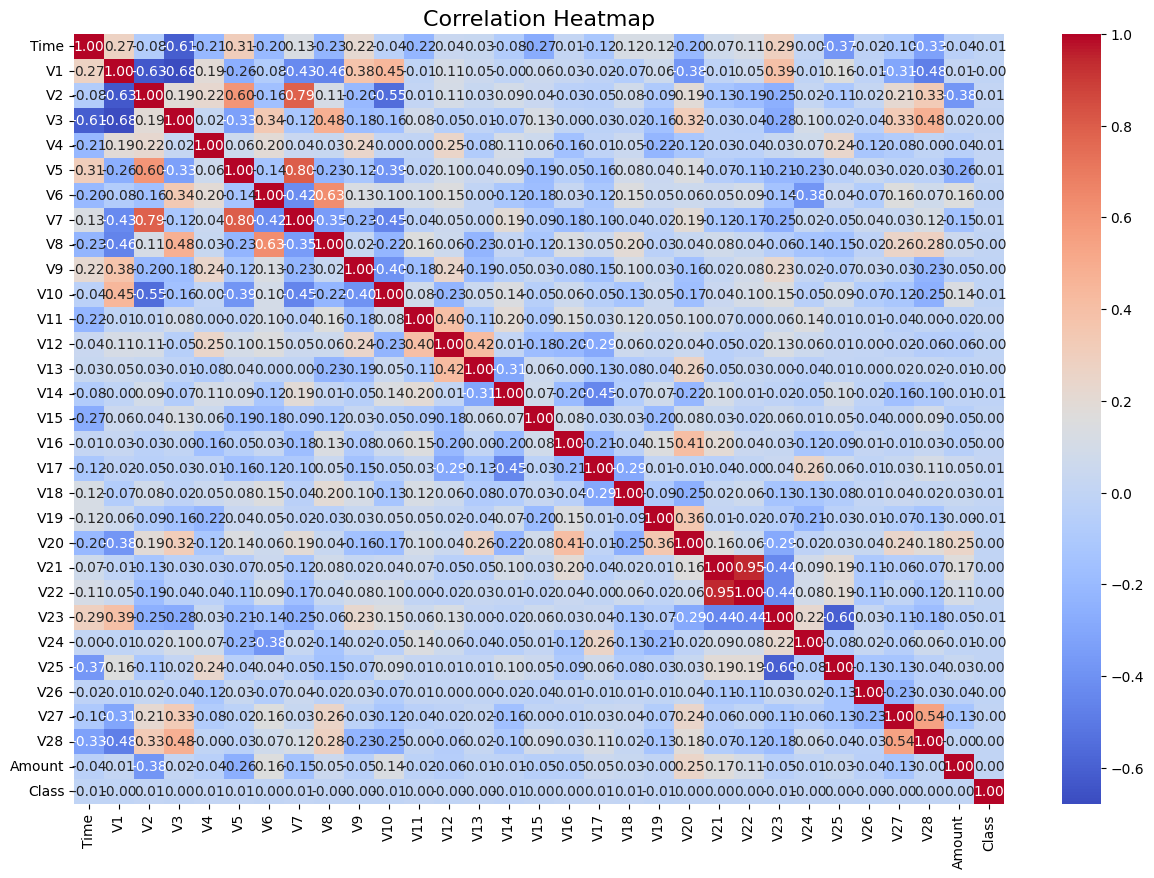

In [15]:
corr = df_no_outliers_full.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [16]:
x=df_no_outliers_full.drop('Class',axis=1)
y=df_no_outliers_full['Class']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 20
error = []
accuracy = []
for i in range(1, k , 2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  error.append(1-metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

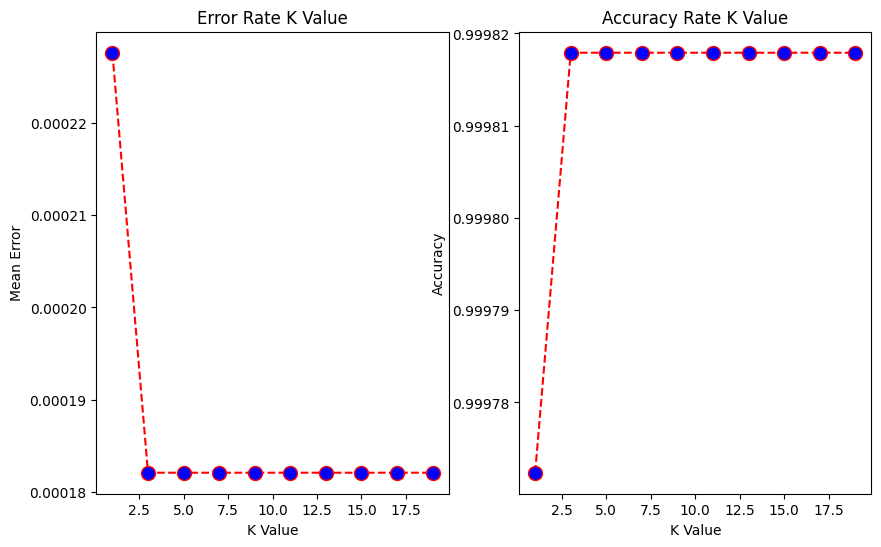

In [20]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(range(1,k, 2), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(range(1,k,2 ), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:

y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

In [23]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  0.9998975701360041
Accuracy on test data:  0.9998179086812036


In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21963
           1       0.00      0.00      0.00         4

    accuracy                           1.00     21967
   macro avg       0.50      0.50      0.50     21967
weighted avg       1.00      1.00      1.00     21967



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [26]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 20
error = []
accuracy = []
for i in range(1, k , 2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train2, y_train2)
  y_pred2 = knn.predict(x_test2)
  error.append(1-metrics.accuracy_score(y_test2, y_pred2))
  accuracy.append(metrics.accuracy_score(y_test2, y_pred2))

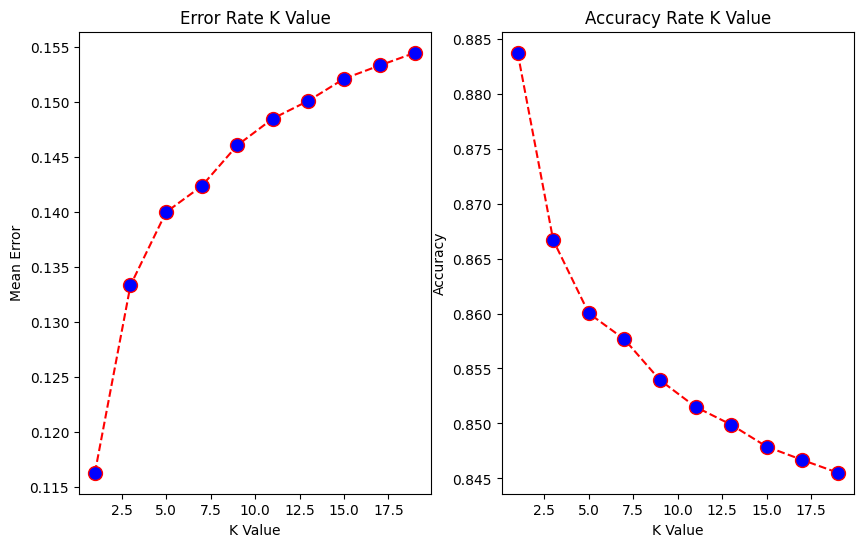

In [30]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(range(1,k, 2), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(range(1,k,2 ), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=1)

In [32]:
y_pred_test2 = knn.predict(x_test2)
y_pred_train2 = knn.predict(x_train2)

In [33]:
accuracy_train = accuracy_score(y_train2, y_pred_train2)
accuracy_test = accuracy_score(y_test2, y_pred_test2)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  1.0
Accuracy on test data:  0.8837188126024403


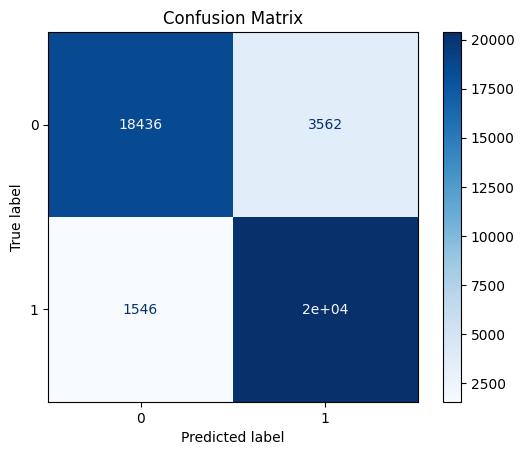

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test2,y_pred_test2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3,5]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5, refit= True)
grid.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5]})

In [36]:
print(grid.best_params_)

{'n_neighbors': 3}


In [37]:
test_score = grid.score(x_test2, y_test2)
test_score


0.8666681843015844

Logistic

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train2, y_train2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred_test3 = lr.predict(x_test2)
y_pred_train3 = lr.predict(x_train2)

In [40]:
accuracy_train = accuracy_score(y_train2, y_pred_train3)
accuracy_test = accuracy_score(y_test2, y_pred_test3)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  0.872807466848785
Accuracy on test data:  0.8727690766709161


naive_bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train2, y_train2)

GaussianNB()

In [42]:
y_pred_test4 = lr.predict(x_test2)
y_pred_train4 = lr.predict(x_train2)

In [43]:
accuracy_train = accuracy_score(y_train2, y_pred_train4)
accuracy_test = accuracy_score(y_test2, y_pred_test4)

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)

Accuracy on train data:  0.872807466848785
Accuracy on test data:  0.8727690766709161


In [44]:
print(classification_report(y_test2, y_pred_test4))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     21998
           1       0.88      0.86      0.87     21930

    accuracy                           0.87     43928
   macro avg       0.87      0.87      0.87     43928
weighted avg       0.87      0.87      0.87     43928



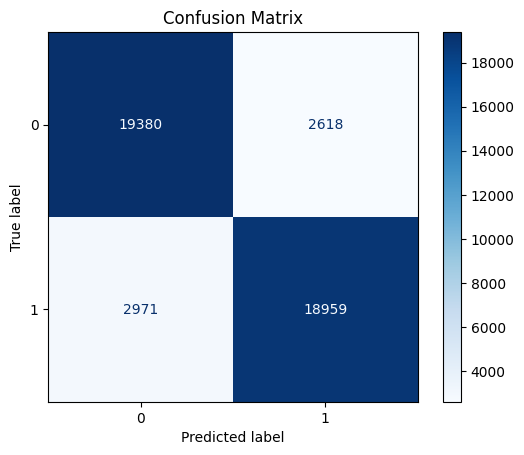

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test2,y_pred_test4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy',max_depth=2 )
dt.fit(x_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test2)
accuracy_score(y_test2, y_pred)

0.8461118193407394

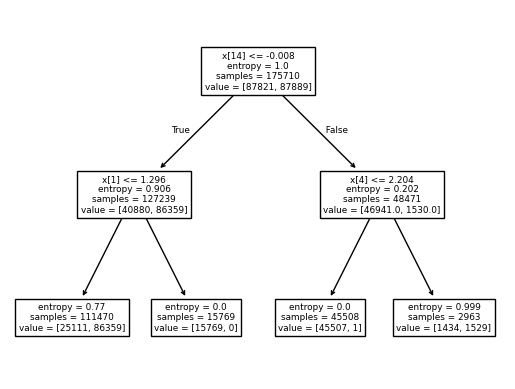

In [48]:
import sklearn.tree as tree
tree.plot_tree(dt)
plt.show()

In [49]:
dt.get_depth()



2

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=30)
rf_classifier.fit(x_train2, y_train2)

RandomForestClassifier(random_state=30)

In [51]:
rf_classifier.score(x_test2, y_test2)

0.9999772354762338

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_classifier.predict(x_test2)

print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred))


Confusion Matrix:
[[21997     1]
 [    0 21930]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21998
           1       1.00      1.00      1.00     21930

    accuracy                           1.00     43928
   macro avg       1.00      1.00      1.00     43928
weighted avg       1.00      1.00      1.00     43928



In [52]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(x_train2, y_train2)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [53]:
ada_boost.score(x_test2, y_test2)


0.9768257148060463